In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
tips = sns.load_dataset("tips")

In [2]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [3]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_day = LabelEncoder()
le_time = LabelEncoder()
tips['sex_encoded'] = le_sex.fit_transform(tips['sex'])     # Male=1, Female=0
tips['smoker_encoded'] = le_smoker.fit_transform(tips['smoker']) 
tips['day_encoded'] = le_sex.fit_transform(tips['day'])     # Male=1, Female=0
tips['time_encoded'] = le_smoker.fit_transform(tips['time']) 

<Axes: >

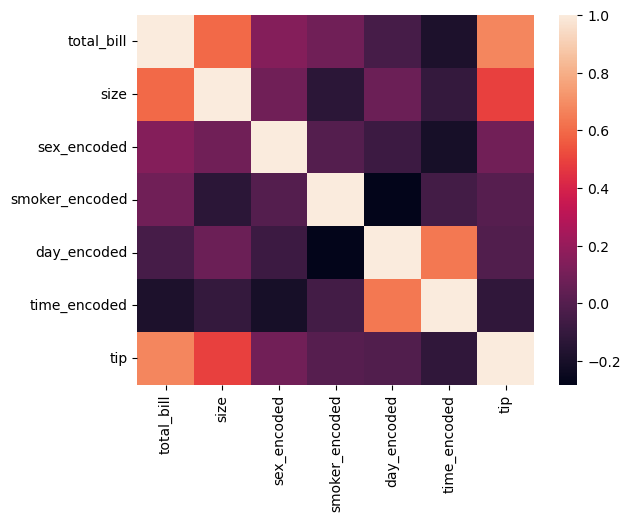

In [6]:
tips = tips[['total_bill', 'size', 'sex_encoded', 'smoker_encoded', 'day_encoded', 'time_encoded', 'tip']]
sns.heatmap(tips.corr())

In [7]:
tips.corr()

,total_bill,size,sex_encoded,smoker_encoded,day_encoded,time_encoded,tip
total_bill,1.000000,0.598315,0.144877,0.085721,-0.043550,-0.183118,0.675734
size,0.598315,1.000000,0.086195,-0.133178,0.069510,-0.103411,0.489299
sex_encoded,0.144877,0.086195,1.000000,0.002816,-0.078292,-0.205231,0.088862
smoker_encoded,0.085721,-0.133178,0.002816,1.000000,-0.282721,-0.054921,0.005929
day_encoded,-0.043550,0.069510,-0.078292,-0.282721,1.000000,0.638019,-0.011548
time_encoded,-0.183118,-0.103411,-0.205231,-0.054921,0.638019,1.000000,-0.121629
tip,0.675734,0.489299,0.088862,0.005929,-0.011548,-0.121629,1.000000


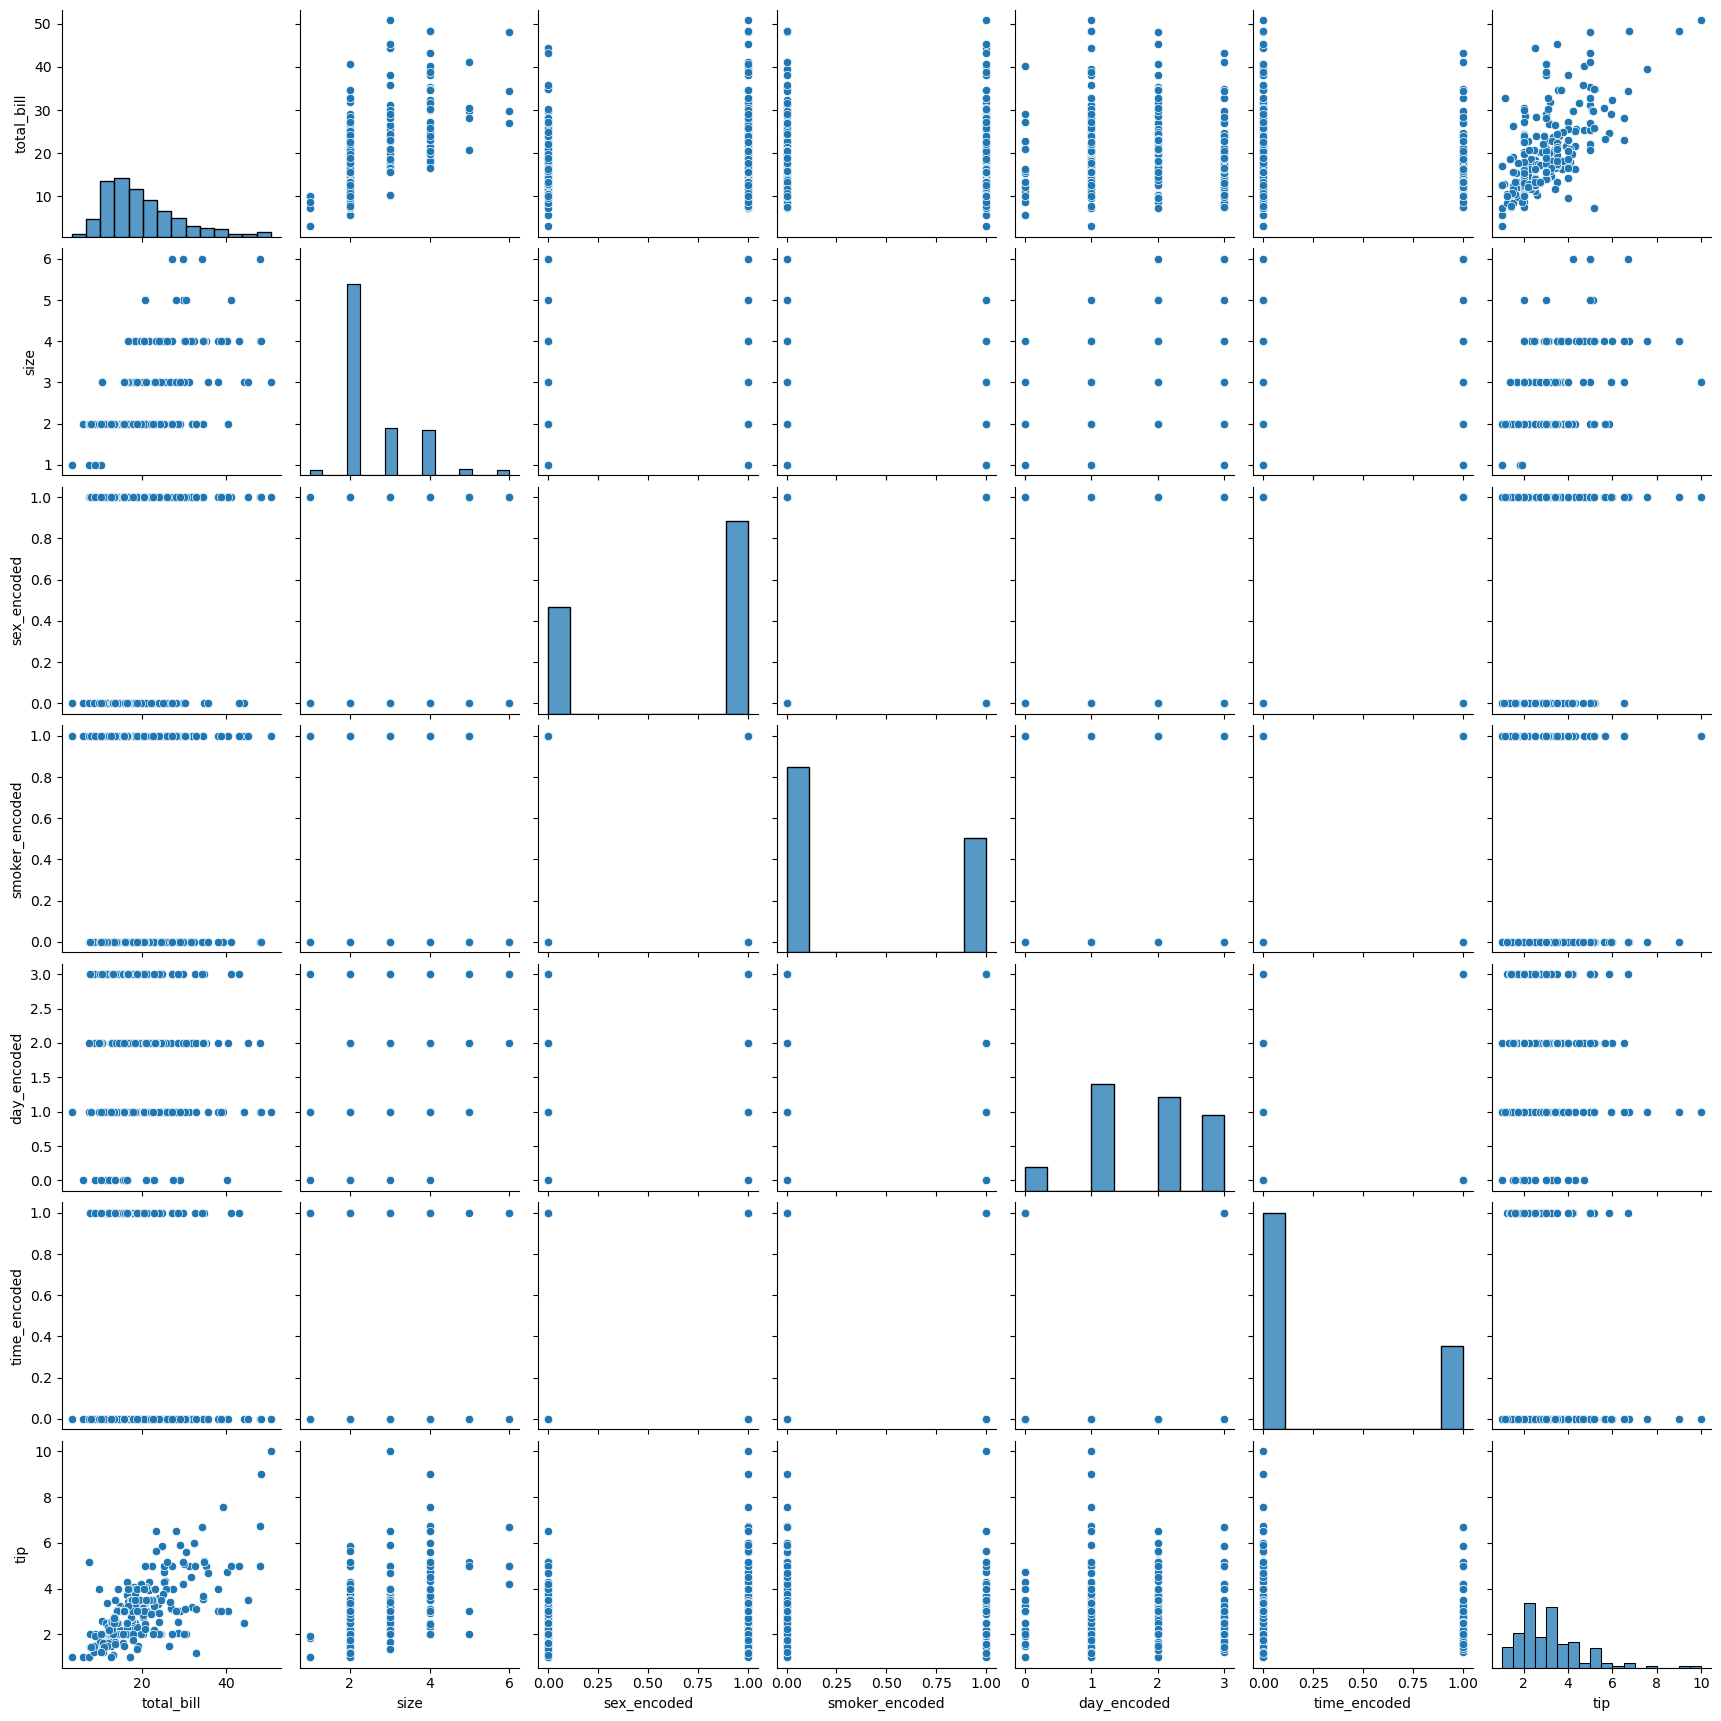

In [8]:
sns.pairplot(tips)

In [9]:
X = tips[['total_bill', 'size']]
y = tips['tip']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict on train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# RMSE scores
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {r2_train:.3f}, RMSE: {rmse_train:.3f}")
print(f"Test R²: {r2_test:.3f}, RMSE: {rmse_test:.3f}")

Train R²: 0.452, RMSE: 1.056
Test R²: 0.481, RMSE: 0.805


## With Standardization

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [14]:
model_s = LinearRegression()
model_s.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# Predict on train and test sets
y_train_pred = model_s.predict(X_train_scaled)
y_test_pred = model_s.predict(X_test_scaled)

# R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# RMSE scores
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R²: {r2_train:.3f}, RMSE: {rmse_train:.3f}")
print(f"Test R²: {r2_test:.3f}, RMSE: {rmse_test:.3f}")

Train R²: 0.452, RMSE: 1.056
Test R²: 0.481, RMSE: 0.805
